In [2]:
import pandas as pd

In [32]:
df_1 = pd.read_excel('dataset.xlsx', header=0, index_col=0)

In [4]:
df_1.head()

,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,1,0.0295,109.001,4,0.187,6 ContributorsThe Messenger (Live from Las Veg...
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,1,0.0261,74.984,4,0.222,93 ContributorsCancer Lyrics\nTurn away\nIf yo...
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,1,0.0278,76.426,4,0.118,129 ContributorsTranslationsРусскийDeutschEspa...
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,1,0.1230,179.722,4,0.255,109 ContributorsTranslationsEspañolI’m Not Oka...
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,1,0.0525,73.019,4,0.327,58 ContributorsHold on Till May Lyrics\nShe si...


> Remove songs without lyric and select only lyrics

In [5]:
sum(df_1['lyrics'] == 'lyrics not available')

198

In [33]:
df_1 = df_1[df_1['lyrics'] != 'lyrics not available']

In [34]:
from langdetect import detect

In [35]:
# Assuming you have a DataFrame named 'df' with a 'Lyrics' column
df_1['language'] = df_1['lyrics'].apply(lambda x: detect(x) if isinstance(x, str) else 'unknown')

In [9]:
df_1.language.value_counts()

en    686
es     93
fr     45
ca      3
pt      3
it      2
tr      1
so      1
sk      1
tl      1
Name: language, dtype: int64

In [36]:
# only leave en, es ,fr
df_1 = df_1[df_1['language'].isin(['en', 'es', 'fr'])]
# divide into 3 dataframes
df_en = df_1[df_1['language'] == 'en']
df_es = df_1[df_1['language'] == 'es']
df_fr = df_1[df_1['language'] == 'fr']

In [37]:
# to list 
lyrics_en = df_en['lyrics'].tolist()
lyrics_es = df_es['lyrics'].tolist()
lyrics_fr = df_fr['lyrics'].tolist()

In [38]:
import spacy

In [39]:
def process_lyrics(lyrics, language_model):
    processed_lyrics = []
    for lyric in lyrics:
        doc = language_model(lyric)
        tokens = [token.lemma_ for token in doc if not token.is_stop]
        processed_lyrics.append(tokens)
    return processed_lyrics

def remove_unwanted_words(processed_lyrics, unwanted_words):
    cleaned_lyrics = []

    for tokens in processed_lyrics:
        cleaned_tokens = [token for token in tokens if token not in unwanted_words]
        cleaned_lyrics.append(cleaned_tokens)

    return cleaned_lyrics

In [40]:

# Load the language models for each language
nlp_en = spacy.load('en_core_web_sm')
nlp_es = spacy.load('es_core_news_sm')
nlp_fr = spacy.load('fr_core_news_sm')

# Process English lyrics
processed_lyrics_en = process_lyrics(lyrics_en, nlp_en)

# Process Spanish lyrics
processed_lyrics_es = process_lyrics(lyrics_es, nlp_es)

# Process French lyrics
processed_lyrics_fr = process_lyrics(lyrics_fr, nlp_fr)

In [41]:


# List of unwanted words to remove
unwanted_words = ["\n", "(", ")", ",", ]

# Processed lyrics for different languages (from process_lyrics function)
# processed_lyrics_en, processed_lyrics_es, processed_lyrics_fr

# Remove unwanted words from processed lyrics
cleaned_lyrics_en = remove_unwanted_words(processed_lyrics_en, unwanted_words)
cleaned_lyrics_es = remove_unwanted_words(processed_lyrics_es, unwanted_words)
cleaned_lyrics_fr = remove_unwanted_words(processed_lyrics_fr, unwanted_words)

In [42]:
cleaned_lyrics_en[0]

['6',
 'ContributorsThe',
 'Messenger',
 'live',
 'Las',
 'Vegas',
 '2011',
 'lyricswhen',
 'feel',
 'cut',
 'cruel',
 'world',
 'instinct',
 'tell',
 'run',
 'listen',
 'heart',
 'angel',
 'voice',
 'sing',
 'guide',
 'home',
 'life',
 'leave',
 'blind',
 'Love',
 'keep',
 'kind',
 'keep',
 'kind',
 'suffer',
 'spirit',
 'break',
 'grow',
 'desperate',
 'fight',
 'remember',
 'love',
 'melody',
 'bring',
 'right',
 'home',
 'life',
 'leave',
 'blind',
 'Love',
 'keep',
 'kind',
 'life',
 'leave',
 'blind',
 'Love',
 'keep',
 'kind',
 'Ohhhhhh',
 'Ohhhhhhh',
 '!',
 'Ohhhhhh',
 '!',
 'Ohhhhhh',
 'Ohhhhhhh',
 '!',
 'Ohhhhhhh!You',
 'likeembed']

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [45]:
from textblob import TextBlob
import spacy

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaz/nltk_data...


True

In [46]:

# Load the language models for each language
nlp_en = spacy.load('en_core_web_sm')
nlp_es = spacy.load('es_core_news_sm')
nlp_fr = spacy.load('fr_core_news_sm')

def analyze_sentiment(lyrics, language_model):
    sentiment_scores = []
    for lyric in lyrics:
        doc = language_model(lyric)
        text = " ".join([token.lemma_ for token in doc if not token.is_stop])
        blob = TextBlob(text)
        sentiment_scores.append(blob.sentiment)
    return sentiment_scores

# Assuming you have DataFrames df_en, df_es, df_fr with columns 'Lyrics' and 'language'

language_dataframes = {
    'en': df_en,
    'es': df_es,
    'fr': df_fr,
}

new_dataframes = {}

for lang, df in language_dataframes.items():
    sentiment_scores = analyze_sentiment(df['lyrics'], language_model=nlp_en if lang == 'en' else nlp_es if lang == 'es' else nlp_fr)

    new_df = df.copy()  # Create a copy of the original DataFrame
    new_df['Sentiment'] = sentiment_scores
    new_dataframes[lang] = new_df

# The 'new_dataframes' dictionary now contains new DataFrames with sentiment scores for each language



In [48]:
new_dataframes['en'].head()
# add column for polarity and subjectivity socre from sentiment

,id,name,artist,disc,duration,episode,explicit,popularity,danceability,acousticness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lyrics,language,Sentiment
0,1hA4856JVAa0qqgKg6olJf,"The Messenger - Live from Las Vegas, 2011",Linkin Park,1,233280,False,False,37,0.325,0.726000,...,0.1880,-5.711,1,0.0295,109.001,4,0.187,6 ContributorsThe Messenger (Live from Las Veg...,en,"(0.14147186147186147, 0.7357142857142857)"
1,0GgN4MhR5GKn5IcKN0e0rG,Cancer,My Chemical Romance,1,142973,False,False,72,0.457,0.358000,...,0.2780,-4.310,1,0.0261,74.984,4,0.222,93 ContributorsCancer Lyrics\nTurn away\nIf yo...,en,"(-0.06732954545454548, 0.6781250000000001)"
2,10nyNJ6zNy2YVYLrcwLccB,No Surprises,Radiohead,1,229120,False,False,83,0.255,0.057700,...,0.1130,-10.654,1,0.0278,76.426,4,0.118,129 ContributorsTranslationsРусскийDeutschEspa...,en,"(-0.012500000000000002, 0.6319444444444445)"
3,7lRlq939cDG4SzWOF4VAnd,I'm Not Okay (I Promise),My Chemical Romance,1,186480,False,True,78,0.210,0.006020,...,0.2690,-3.427,1,0.1230,179.722,4,0.255,109 ContributorsTranslationsEspañolI’m Not Oka...,en,"(0.2685897435897436, 0.5352564102564104)"
4,5u2FOoFhp495GIj5BJC77J,Hold On Till May,Pierce The Veil,1,278586,False,False,66,0.460,0.000585,...,0.0735,-3.710,1,0.0525,73.019,4,0.327,58 ContributorsHold on Till May Lyrics\nShe si...,en,"(0.17705882352941177, 0.4994117647058824)"


In [49]:
def split_sentiment_column(df, sentiment_column_name, polarity_column_name, subjectivity_column_name):
    df[[polarity_column_name, subjectivity_column_name]] = pd.DataFrame(df[sentiment_column_name].tolist(), index=df.index)
    df = df.drop(sentiment_column_name, axis=1)
    return df

In [50]:
new_dataframes['en'] = split_sentiment_column(new_dataframes['en'], 'Sentiment', 'Polarity', 'Subjectivity')
new_dataframes['es'] = split_sentiment_column(new_dataframes['es'], 'Sentiment', 'Polarity', 'Subjectivity')
new_dataframes['fr'] = split_sentiment_column(new_dataframes['fr'], 'Sentiment', 'Polarity', 'Subjectivity')

<Axes: >

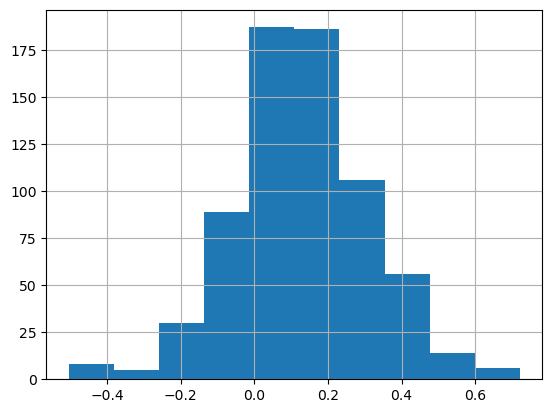

In [55]:
new_dataframes['en']['Polarity'].hist()

<Axes: >

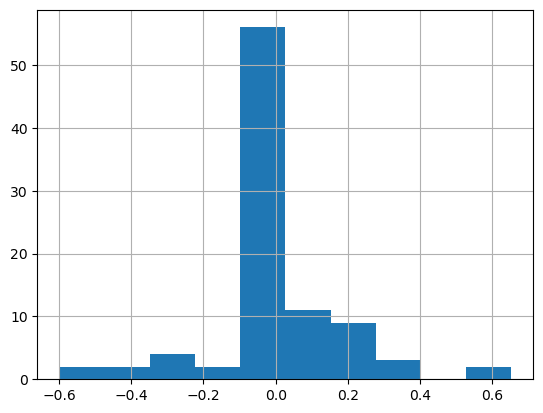

In [56]:
new_dataframes['es']['Polarity'].hist()

<Axes: >

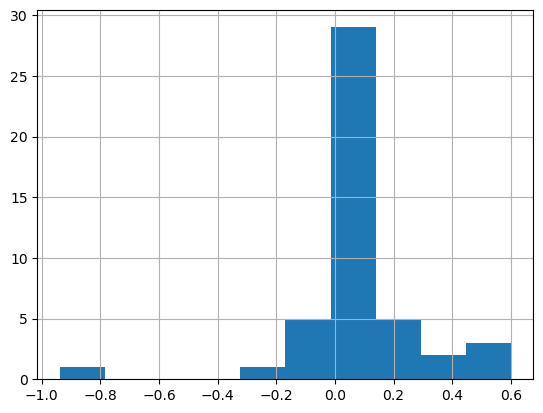

In [57]:
new_dataframes['fr']['Polarity'].hist()

In [58]:
# to csv
new_dataframes['en'].to_csv('songs_en.csv', index_label=False)
new_dataframes['es'].to_csv('songs_es.csv', index_label=False)
new_dataframes['fr'].to_csv('songs_fr.csv', index_label=False)


In [62]:
# drop lyrics column
# new_dataframes['en'].drop('lyrics', axis=1, inplace=True)
# new_dataframes['es'].drop('lyrics', axis=1, inplace=True)
# new_dataframes['fr'].drop('lyrics', axis=1, inplace=True)

In [66]:
new_dataframes['en'].to_excel('songs_en.xlsx', index=False)
new_dataframes['es'].to_excel('songs_es.xlsx', index=False)
new_dataframes['fr'].to_excel('songs_fr.xlsx', index=False)